In [6]:
import pandas as pd 
df = pd.read_csv(
    r"C:\Users\Ateeb Ahmad\Desktop\fraud_detection\data\credit_card_fraud_synthetic.csv"
)
df.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,121958,-2.289061,-1.313758,-0.452562,-0.392802,0.224787,1600.89,0
1,146867,1.432482,-1.095302,-0.129910,-1.362911,-1.017335,4191.85,0
2,131932,1.214722,-0.168797,0.581433,0.699020,0.964415,3271.32,0
3,103694,-0.880864,0.110956,-0.203236,-0.243510,0.362543,1377.51,0
4,119879,-0.881879,0.786970,1.110118,0.015365,-1.135162,4838.72,0


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   int64  
 1   V1      1000 non-null   float64
 2   V2      1000 non-null   float64
 3   V3      1000 non-null   float64
 4   V4      1000 non-null   float64
 5   V5      1000 non-null   float64
 6   Amount  1000 non-null   float64
 7   Class   1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [9]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [10]:
df['Class'].value_counts()

Class
0    982
1     18
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['Class'])

In [12]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,1000.0,86194.539000,50008.474586,235.000000,42052.250000,89361.500000,127614.750000,172627.000000
V1,1000.0,0.017610,1.038301,-3.568205,-0.646795,0.031403,0.742573,3.174442
V2,1000.0,0.069906,1.035560,-2.913672,-0.594730,0.089010,0.759734,3.260491
V3,1000.0,-0.022792,0.992346,-3.239438,-0.693360,-0.008512,0.666350,2.750723
V4,1000.0,0.022354,0.978387,-2.936162,-0.624690,-0.000167,0.664478,3.657702
V5,1000.0,-0.013218,0.998908,-3.708797,-0.711692,0.019587,0.686529,2.840886
Amount,1000.0,2577.052080,1444.284318,25.890000,1358.502500,2636.405000,3849.640000,4998.710000


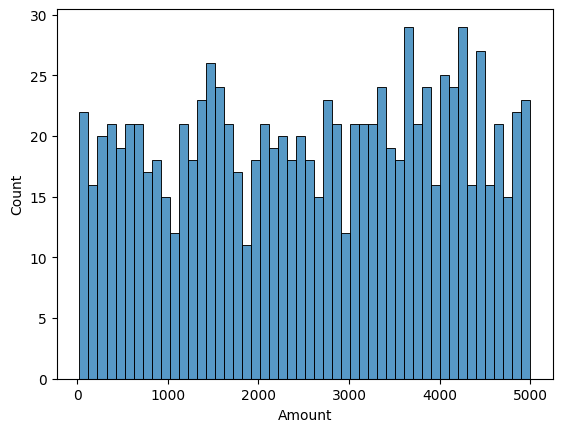

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X['Amount'], bins=50)
plt.show()


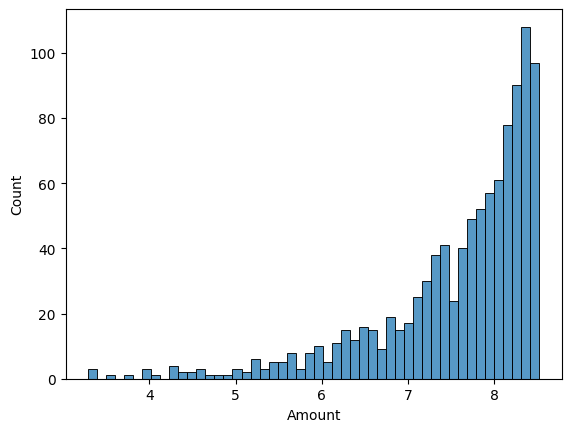

In [14]:
import numpy as np

sns.histplot(np.log1p(X['Amount']), bins=50)
plt.show()

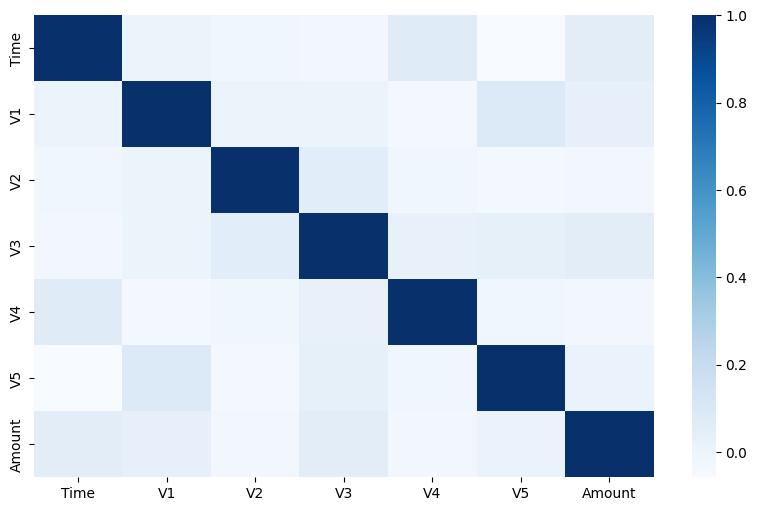

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), cmap='Blues')
plt.show()

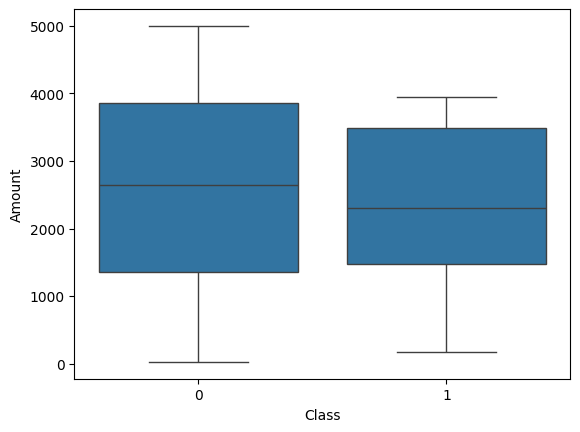

In [16]:
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.show()

In [17]:
y = df['Class']    
X = df.drop(columns=['Class'])

In [18]:
X.var().sort_values()

V4        9.572408e-01
V3        9.847509e-01
V5        9.978171e-01
V2        1.072384e+00
V1        1.078069e+00
Amount    2.085957e+06
Time      2.500848e+09
dtype: float64

In [19]:
import numpy as np

X['Amount_log'] = np.log1p(X['Amount'])
X = X.drop(columns=['Amount'])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.model_selection import train_test_split

# y must still be the label Series/array
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)



In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(200,)


In [23]:
import numpy as np

np.save(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_train.npy", X_train)
np.save(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_test.npy", X_test)
np.save(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\y_test.npy", y_test)


In [24]:
import numpy as np

X_train = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_train.npy")
X_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_test.npy")
y_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\y_test.npy")

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)


(800, 7)
(200, 7)
(200,)


In [55]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.03,   # assume ~1% anomalies
    random_state=42,
    n_jobs=-1
)

iso_forest.fit(X_train)
iso_forest.predict(X_test)
iso_forest.score_samples(X_test)

array([-0.56273822, -0.51942208, -0.4470605 , -0.40912142, -0.41581162,
       -0.45907146, -0.47226951, -0.49104456, -0.40714281, -0.3935725 ,
       -0.50898003, -0.43282916, -0.51101049, -0.49070245, -0.45565409,
       -0.42263748, -0.46864379, -0.43471699, -0.44368602, -0.42869203,
       -0.42931872, -0.4143442 , -0.41586973, -0.45974499, -0.42581118,
       -0.42434192, -0.51961099, -0.4467828 , -0.49170422, -0.39655714,
       -0.40226317, -0.44634446, -0.52499135, -0.42079073, -0.45169929,
       -0.42150549, -0.43910138, -0.45105813, -0.49937944, -0.41719265,
       -0.49416739, -0.44190826, -0.50425065, -0.4051714 , -0.39039084,
       -0.44219392, -0.43136484, -0.41094363, -0.46914462, -0.42887214,
       -0.52793331, -0.42189437, -0.42727933, -0.43107567, -0.46572825,
       -0.41130444, -0.3956801 , -0.43192923, -0.43077302, -0.39053013,
       -0.51537472, -0.39719178, -0.4192244 , -0.49765285, -0.50068686,
       -0.46433741, -0.42038022, -0.47954073, -0.4295111 , -0.39

In [56]:
import numpy as np

X_train = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_train.npy")
X_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_test.npy")
y_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\y_test.npy")

In [57]:
X_train_normal = X_train[y_train == 0]

In [58]:
print(X_train_normal.shape)

(786, 7)


In [59]:
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 4),
            nn.ReLU(),
            nn.Linear(4, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [60]:
model = AutoEncoder(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [61]:
X_train_tensor = torch.tensor(X_train_normal, dtype=torch.float32)

In [62]:
epochs = 50

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, X_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

Epoch 0, Loss: 1.149219
Epoch 10, Loss: 1.128600
Epoch 20, Loss: 1.110122
Epoch 30, Loss: 1.093498
Epoch 40, Loss: 1.078742


In [33]:
model.eval()

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    reconstructions = model(X_test_tensor)

recon_error = torch.mean((X_test_tensor - reconstructions) ** 2, dim=1).numpy()

In [63]:
threshold = np.percentile(recon_error, 95)
y_pred_ae = (recon_error > threshold).astype(int)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))

[[186  10]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       196
           1       0.00      0.00      0.00         4

    accuracy                           0.93       200
   macro avg       0.49      0.47      0.48       200
weighted avg       0.96      0.93      0.94       200



In [68]:
import os
os.makedirs("models", exist_ok=True)

In [69]:
torch.save(model.state_dict(), "models/autoencoder.pt")

In [70]:
import os
os.listdir("models")

['autoencoder.pt', 'isolation_forest.pkl']

In [71]:
import numpy as np
import joblib
import torch
import torch.nn as nn

In [72]:
X_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_test.npy")
y_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\y_test.npy")

In [73]:
import os, joblib
os.makedirs("models", exist_ok=True)
joblib.dump(iso_forest, "models/isolation_forest.pkl")


['models/isolation_forest.pkl']

In [74]:
iso_forest = joblib.load("models/isolation_forest.pkl")

In [75]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 4),
            nn.ReLU(),
            nn.Linear(4, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, input_dim)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

model = AutoEncoder(input_dim=X_test.shape[1])
model.load_state_dict(torch.load("models/autoencoder.pt"))
model.eval()


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=7, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
  )
)

In [76]:
y_pred_if = iso_forest.predict(X_test)
y_pred_if = (y_pred_if == -1).astype(int)


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

print("Isolation Forest Results")
print(confusion_matrix(y_test, y_pred_if))
print(classification_report(y_test, y_pred_if))


Isolation Forest Results
[[190   6]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       196
           1       0.00      0.00      0.00         4

    accuracy                           0.95       200
   macro avg       0.49      0.48      0.49       200
weighted avg       0.96      0.95      0.95       200



In [52]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    recon = model(X_test_tensor)

recon_error = torch.mean((X_test_tensor - recon) ** 2, dim=1).numpy()


In [78]:
threshold = np.percentile(recon_error, 95)
y_pred_ae = (recon_error > threshold).astype(int)


In [79]:
print("Autoencoder Results")
print(confusion_matrix(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))


Autoencoder Results
[[186  10]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       196
           1       0.00      0.00      0.00         4

    accuracy                           0.93       200
   macro avg       0.49      0.47      0.48       200
weighted avg       0.96      0.93      0.94       200



In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\X_test.npy")
y_test  = np.load(r"c:\users\Ateeb Ahmad\Desktop\fraud_detection\data\y_test.npy")


In [81]:
print(X_test.shape, y_test.shape)


(200, 7) (200,)


In [82]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_test)


In [83]:
print(pca.explained_variance_ratio_)


[0.18173079 0.15890026]


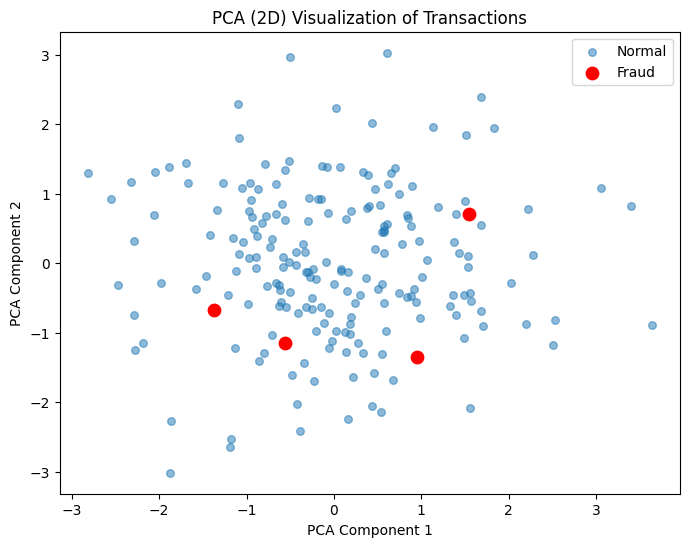

In [84]:
plt.figure(figsize=(8,6))

# Normal transactions
plt.scatter(
    X_pca[y_test == 0, 0],
    X_pca[y_test == 0, 1],
    alpha=0.5,
    label="Normal",
    s=30
)

# Fraud transactions
plt.scatter(
    X_pca[y_test == 1, 0],
    X_pca[y_test == 1, 1],
    color="red",
    label="Fraud",
    s=80
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA (2D) Visualization of Transactions")
plt.legend()
plt.show()


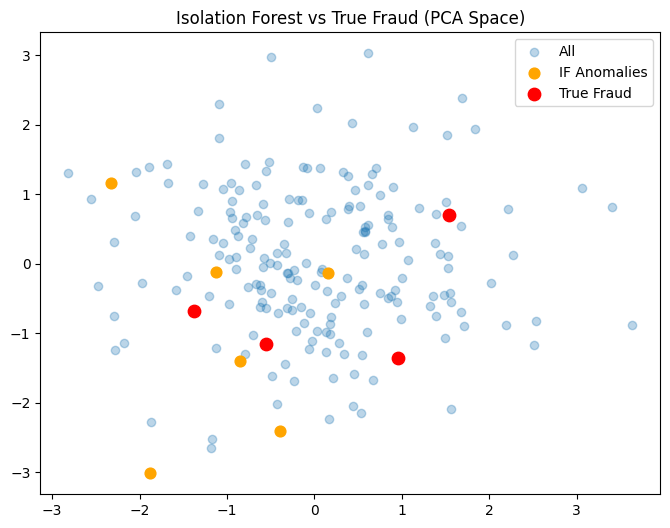

In [85]:
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3, label="All")

plt.scatter(
    X_pca[y_pred_if == 1, 0],
    X_pca[y_pred_if == 1, 1],
    color="orange",
    label="IF Anomalies",
    s=60
)

plt.scatter(
    X_pca[y_test == 1, 0],
    X_pca[y_test == 1, 1],
    color="red",
    label="True Fraud",
    s=80
)

plt.legend()
plt.title("Isolation Forest vs True Fraud (PCA Space)")
plt.show()


In [88]:
import joblib, torch, os
os.makedirs("models", exist_ok=True)

joblib.dump(iso_forest, "models/isolation_forest.pkl")
torch.save(model.state_dict(), "models/autoencoder.pt")


In [1]:
import os
os.getcwd()


'C:\\Users\\Ateeb Ahmad'